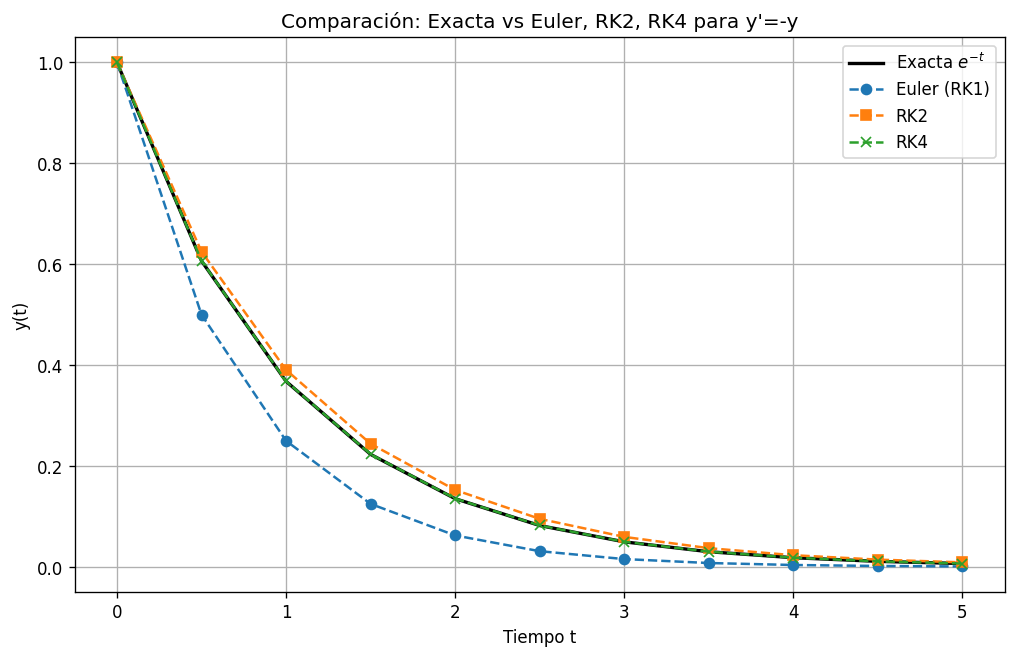

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ODE: y' = -y
def f_simple(t, y):
    return -y

# Cada método
def euler_step(t, y, h, f):
    k1 = f(t, y)
    return t + h, y + h * k1

def rk2_step(t, y, h, f):
    k1 = f(t, y)
    k2 = f(t + h/2, y + h/2 * k1)
    return t + h, y + h * k2

def rk4_step(t, y, h, f):
    k1 = f(t, y)
    k2 = f(t + h/2, y + h/2 * k1)
    k3 = f(t + h/2, y + h/2 * k2)
    k4 = f(t + h,   y + h * k3)
    return t + h, y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

# Integrador 
def integrate(f, y0, t, stepper):
    y = float(y0)
    Y = np.empty(t.size, dtype=float) #array donde vamos a ir guardando todas las soluciones.
    Y[0] = y #condición inicial en la primera posición.
    for n in range(t.size - 1): #recorremos todos los puntos de tiempo.
        tn, y = t[n], Y[n] #valores actuales de t y y.
        _, y_next = stepper(tn, y, t[n+1]-t[n], f) #aplicamos el método de stepper.
        Y[n+1] = y_next #guardamos el nuevo valor de y.
    return Y

# Parámetros
t0, t1, h = 0, 5, 0.5
time = np.arange(t0, t1+h, h)
y0 = 1.0

# Integración
Y_euler = integrate(f_simple, y0, time, euler_step)
Y_rk2   = integrate(f_simple, y0, time, rk2_step)
Y_rk4   = integrate(f_simple, y0, time, rk4_step)
Y_exact = np.exp(-time)

# Gráficos
plt.figure(figsize=(10,6), dpi=120)
plt.plot(time, Y_exact, "k", linewidth=2, label="Exacta $e^{-t}$")
plt.plot(time, Y_euler, "o--", label="Euler (RK1)")
plt.plot(time, Y_rk2,   "s--", label="RK2")
plt.plot(time, Y_rk4,   "x--", label="RK4")

plt.xlabel("Tiempo t")
plt.ylabel("y(t)")
plt.title("Comparación: Exacta vs Euler, RK2, RK4 para y'=-y")
plt.grid(True)
plt.legend()
plt.show()

Se desea resolver numéricamente el siguiente problema de valor inicial para una ecuación diferencial ordinaria de segundo orden:
$$
m\,\ddot{x}(t) + c\,\dot{x}(t) + k\,x(t) = 0,
$$
con condiciones iniciales
$
x(0) = x_0, \qquad \dot{x}(0) = v_0.
$

- $m= 1$
- $c = 1.256637061$
- $k= (2 \pi )^{2}$
- $x_{0}= 1\quad v_{0}= 1$

Para poder aplicar métodos numéricos como Euler o Runge–Kutta, es conveniente 
reescribir esta ecuación de segundo orden como un sistema equivalente de dos 
ecuaciones de primer orden. Para ello, definimos las variable v = x'. El sistema queda:

\begin{cases}
x’ = v \\
v’ = -\tfrac{c}{m} v - \tfrac{k}{m} x
\end{cases}


--> Esta ecuación en función de los parametros tiene distintos tipos de soluciones que en fisica 1 ya resolvieron:
Acá solo vemos el caso subamortiguado para simplificar y no meternos en discusiones fisicas/exploración de parametros.



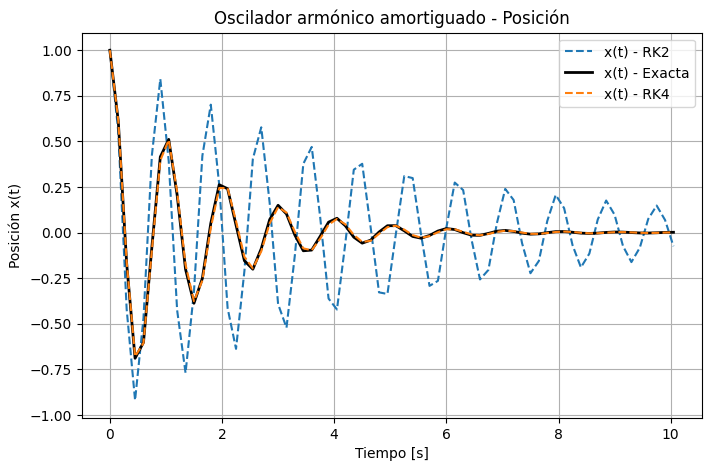

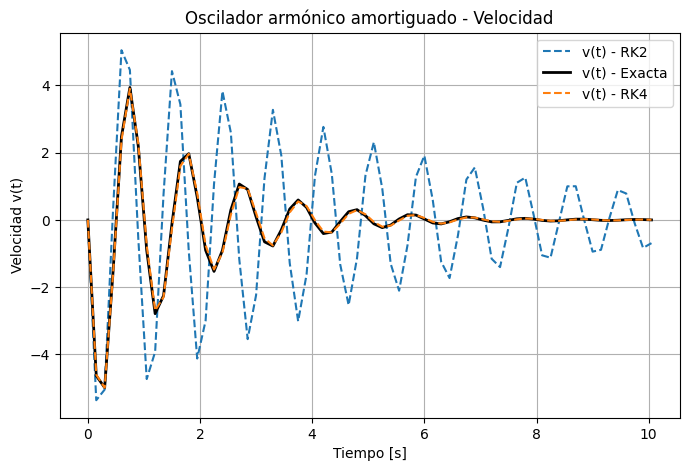

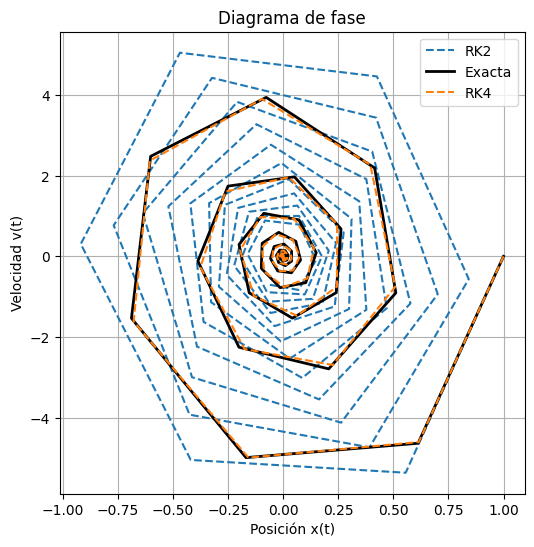

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros físicos
m = 1.0
k = (2*np.pi)**2
c = 1.256637061
x0, v0 = 1.0, 0.0

# Intervalo de simulación
t0, t1 = 0.0, 10.0
h = 0.15

# Mallado temporal construido a partir de h
N = int(np.round((t1 - t0)/h))
t = t0 + h * np.arange(N + 1, dtype=float)

# Sistema oscilador amortiguado
def f_damped_oscillator(t, y, m, c, k):
    x, v = y[0], y[1]
    return np.array([v, -(c/m)*v - (k/m)*x], dtype=float)

# Runge-Kutta 2
def rk2_step(t, y, h, f, *fargs):
    k1 = f(t, y, *fargs)
    k2 = f(t + 0.5*h, y + 0.5*h*k1, *fargs)
    y_next = y + h * k2
    return t + h, y_next

# Runge-Kutta 4
def rk4_step(t, y, h, f, *fargs):
    k1 = f(t, y, *fargs)
    k2 = f(t + 0.5*h, y + 0.5*h*k1, *fargs)
    k3 = f(t + 0.5*h, y + 0.5*h*k2, *fargs)
    k4 = f(t + h,     y + h*k3,     *fargs)
    y_next = y + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
    return t + h, y_next

# Integrador 
def integrate(f, y0, t, stepper, *fargs):
    y = np.array(y0, dtype=float)
    Y = np.empty((t.size, y.size), dtype=float)
    Y[0] = y
    for n in range(t.size - 1):
        _tn = t[n]
        _h  = t[n+1] - t[n]
        _, y = stepper(_tn, y, _h, f, *fargs)
        Y[n+1] = y
    return Y

# Solución exacta subamortiguada
def ground_truth_subamortiguado(t, m, c, k, x0, v0):
    omega0 = np.sqrt(k/m)
    zeta   = c/(2.0*m*omega0)
    omegad = omega0*np.sqrt(1.0 - zeta**2)
    A = x0
    B = (v0 + zeta*omega0*x0)/omegad

    exp_term = np.exp(-zeta*omega0*t)
    cos_term = np.cos(omegad*t)
    sin_term = np.sin(omegad*t)

    x = exp_term * (A*cos_term + B*sin_term)
    x_cos_sin = A*cos_term + B*sin_term
    v = exp_term * ( -zeta*omega0*x_cos_sin + (-A*omegad*sin_term + B*omegad*cos_term) )
    return x, v

# --- Resolver ---
y0 = [x0, v0]
Y_rk2 = integrate(f_damped_oscillator, y0, t, rk2_step, m, c, k)
Y_rk4 = integrate(f_damped_oscillator, y0, t, rk4_step, m, c, k)
X_exact, V_exact = ground_truth_subamortiguado(t, m, c, k, x0, v0)

X_exact, V_exact = ground_truth_subamortiguado(t, m, c, k, x0, v0)

plt.figure(figsize=(8,5))
plt.plot(t, Y_rk2[:,0], label="x(t) - RK2", linestyle="--")
plt.plot(t, X_exact, label="x(t) - Exacta", color="black", linewidth=2)
plt.plot(t, Y_rk4[:,0], label="x(t) - RK4", linestyle="--")
plt.xlabel("Tiempo [s]")
plt.ylabel("Posición x(t)")
plt.title("Oscilador armónico amortiguado - Posición")
plt.legend()
plt.grid(True)
plt.show()

# --- Gráfico 2: t vs v ---
plt.figure(figsize=(8,5))
plt.plot(t, Y_rk2[:,1], label="v(t) - RK2", linestyle="--")
plt.plot(t, V_exact, label="v(t) - Exacta", color="black", linewidth=2)
plt.plot(t, Y_rk4[:,1], label="v(t) - RK4", linestyle="--")
plt.xlabel("Tiempo [s]")
plt.ylabel("Velocidad v(t)")
plt.title("Oscilador armónico amortiguado - Velocidad")
plt.legend()
plt.grid(True)
plt.show()

# --- Gráfico 3: diagrama de fase (x vs v) ---
plt.figure(figsize=(6,6))
plt.plot(Y_rk2[:,0], Y_rk2[:,1], label="RK2", linestyle="--")
plt.plot(X_exact, V_exact, label="Exacta", color="black", linewidth=2)
plt.plot(Y_rk4[:,0], Y_rk4[:,1], label="RK4", linestyle="--")
plt.xlabel("Posición x(t)")
plt.ylabel("Velocidad v(t)")
plt.title("Diagrama de fase")
plt.legend()
plt.grid(True)
plt.show()